In [65]:
from multi_contact_planning import planning
import numpy as np
import scipy.linalg as la
import yaml
import moveit_msgs.msg 
import rospy
import StringIO



In [70]:
qmin = [-1, -1]
qmax = [1, 1]
yaml_options = ''

planner = planning.OmplPlanner(qmin, qmax, yaml_options)


   cai                                                                                                                                                                                                                       


In [36]:
start = [-0.5, -0.5]
goal = [0.5, 0.5]
threshold = 0.0
planner_type = 'PRMstar'
timeout = 1.0

def validity_checker(q):
    return la.norm(q) > 0.2 

In [37]:
planner.setStartAndGoalStates(start, goal, threshold)
planner.setStateValidityPredicate(validity_checker)
success = planner.solve(timeout, planner_type)

print 'Planner output : {}'.format(success)

solution = np.array(planner.getSolutionPath()).transpose()

Planner output : True


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

# helper to plot obstacle regions
def plot_obstacle(qmin, qmax, vc):
    
    n = 20000
    points = np.random.uniform(qmin, qmax, (n,2))
    
    for i in range(n):
        if not vc(points[i, :]):
            plt.plot(points[i, 0], points[i, 1], '.r')

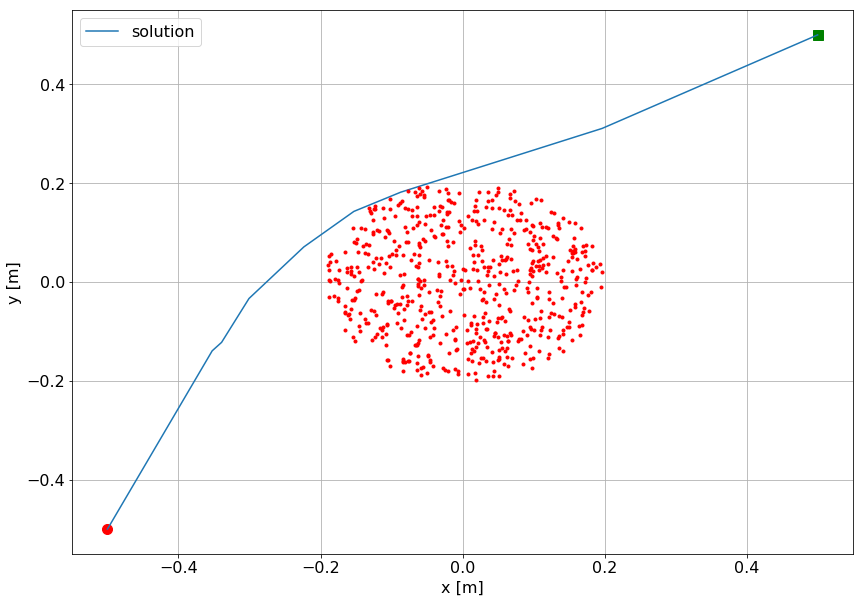

In [50]:
plt.rcParams.update({'figure.figsize': [14, 10],
                     'font.size': 16})

plt.plot(start[0], start[1], 'o', markersize=10, color='red')
plt.plot(goal[0], goal[1], 's', markersize=10, color='green')
plt.plot(solution[0, :], solution[1, :], '-', label='solution')
plt.grid()
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plot_obstacle(qmin, qmax, validity_checker)